# Pymaceuticals Inc.
---

### Analysis

- Bar graph clearly represents that Capomulin and Ramicane have more number of tests conducted and observed mouse timepoints
- Pie chart represents there is only minor difference in the distribution of female versus male mice
- Only Infubinol have the potential outlier
- Positive correlation between mouse weight and average tumor volume(0.84). It clearly represents that increase in the mouse weight have chance of increase in average tumor volume 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = study_results.merge(mouse_metadata, how = 'left')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
combined_data['Mouse ID'].nunique()

249

In [3]:
duplicate_miceID = combined_data.loc[combined_data.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
#len(combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])])

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_miceID = combined_data.loc[combined_data.duplicated(
    ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_miceID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mouse_data = combined_data.loc[combined_data['Mouse ID']=='g989',:]
combined_data[combined_data['Mouse ID'].isin(duplicate_miceID) == True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicate_miceID) == False]
# cleaned_data.head()

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data['Mouse ID'].isin(duplicate_miceID) == False]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_data['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_mean = cleaned_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_median = cleaned_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_var = cleaned_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std = cleaned_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_sem = cleaned_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

drug_df = pd.DataFrame({"Mean Tumor Volume":drug_mean,
                       "Median Tumor Volume":drug_median,
                       "Tumor Volume Variance":drug_var,
                       "Tumor Volume Std. Dev.":drug_std,
                       "Tumor Volume Std. Err.":drug_sem})
drug_df

/var/folders/qf/s2d14spn5dx172lfbl7ptc5h0000gn/T/ipykernel_3698/3626592165.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_mean = cleaned_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
/var/folders/qf/s2d14spn5dx172lfbl7ptc5h0000gn/T/ipykernel_3698/3626592165.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  drug_median = cleaned_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
/var/folders/qf/s2d14spn5dx172lfbl7ptc5h0000gn/T/ipykernel_3698/3626592165.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_df = cleaned_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
aggregated_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

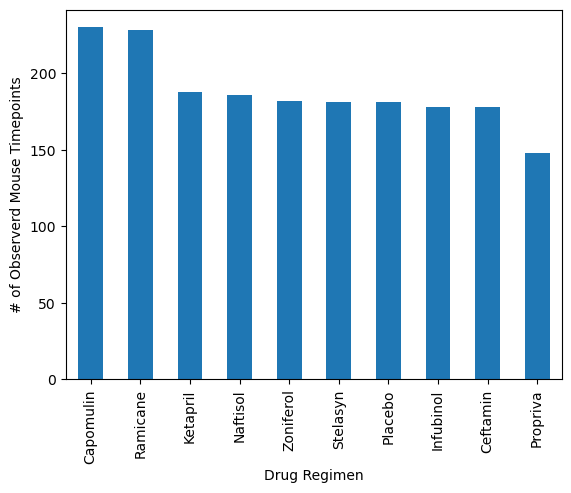

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_mice_per_drug = cleaned_data["Drug Regimen"].value_counts()
total_mice_per_drug_bar = total_mice_per_drug.plot(kind = 'bar',color='tab:blue')
total_mice_per_drug_bar.set_xlabel("Drug Regimen")
total_mice_per_drug_bar.set_ylabel("# of Observerd Mouse Timepoints")

total_bar = total_mice_per_drug_bar

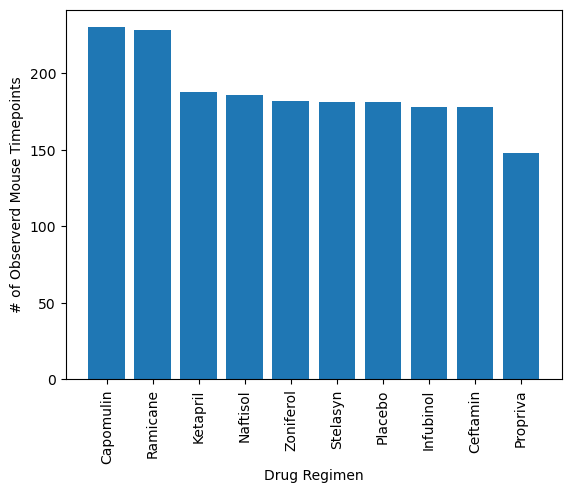

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = total_mice_per_drug.index
y_axis = total_mice_per_drug.values

plt.bar(x_axis, y_axis, color = 'tab:blue', alpha = 1, align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observerd Mouse Timepoints")
plt.xticks(rotation = 90)
plt.show()

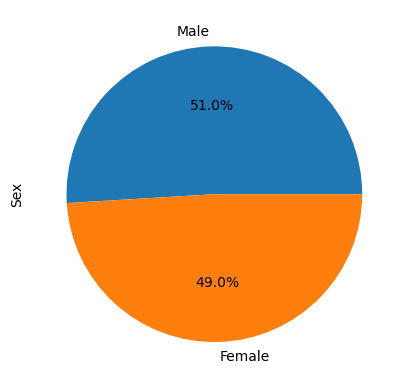

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male_data = cleaned_data["Sex"].value_counts()
plot_pie = female_male_data.plot(kind = 'pie', autopct="%.1f%%", subplots=True)

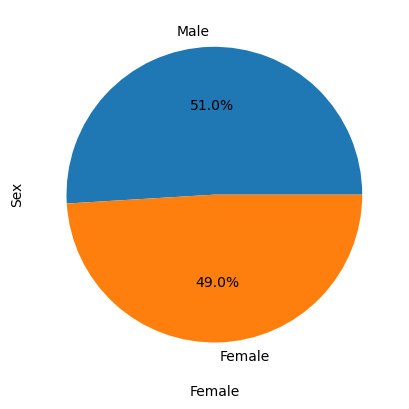

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(female_male_data,labels = ['Male','Female'], autopct="%.1f%%")
plt.xlabel('Female')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = cleaned_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data_timepoint = max_timepoint_df.merge(cleaned_data, on = ['Mouse ID','Timepoint'], how = "left")
# merged_data

In [17]:
#merged_data_timepoint

In [18]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
for drug in drug_list:
    tumor_volume = merged_data_timepoint.loc[merged_data_timepoint['Drug Regimen']==drug, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volume)
    
    # quartiles and finding iqr
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[0.75]
    
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor_volume.loc[(tumor_volume < lower_bound )|(tumor_volume > upper_bound )]
    
    print(f"{drug}, potential outliers: {outliers}")

Capomulin, potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane, potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol, potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin, potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


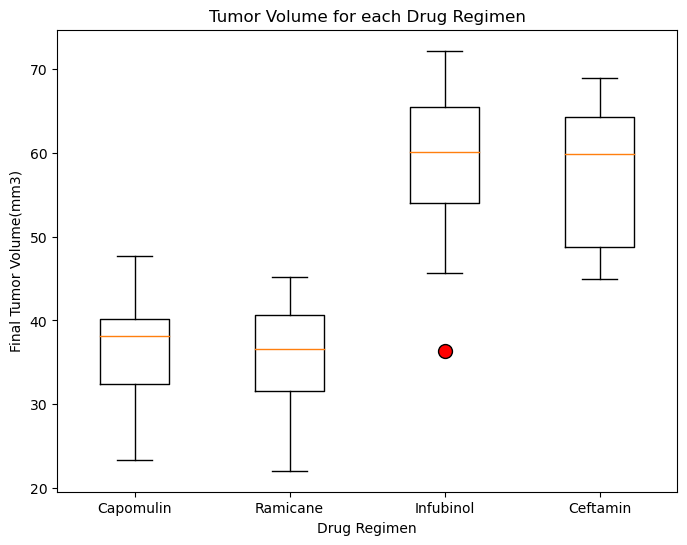

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title('Tumor Volume for each Drug Regimen')
ax.set_ylabel('Final Tumor Volume(mm3)')
ax.set_xlabel('Drug Regimen')
bp = ax.boxplot(tumor_volume_data, labels = drug_list, showfliers=True)

for flier in bp['fliers']:
    flier.set(marker='o', markerfacecolor = "red", markersize = 10)
plt.show()

## Line and Scatter Plots

In [35]:
line_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


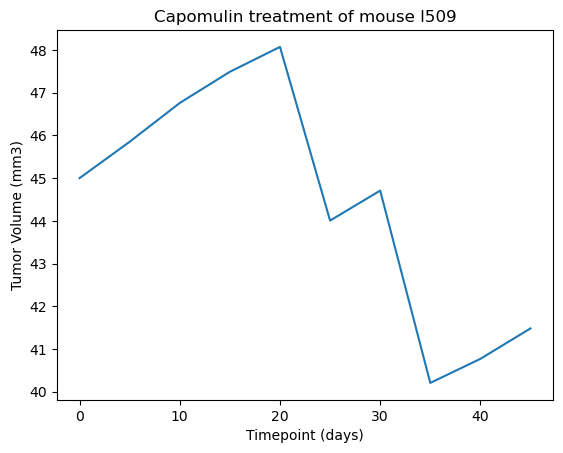

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"]=="Capomulin",:]
line_df = capomulin_df.loc[capomulin_df['Mouse ID']=="l509",:]
# line_df
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1,ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

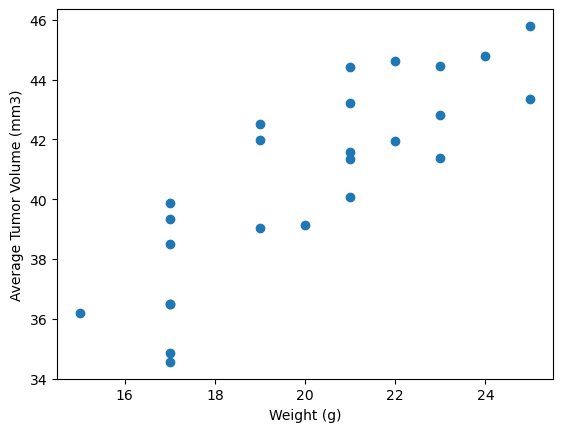

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

fig2, ax2 = plt.subplots()
average_df = capomulin_df.groupby(['Mouse ID']).mean()
x_axis = average_df["Weight (g)"]
y_axis = average_df["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


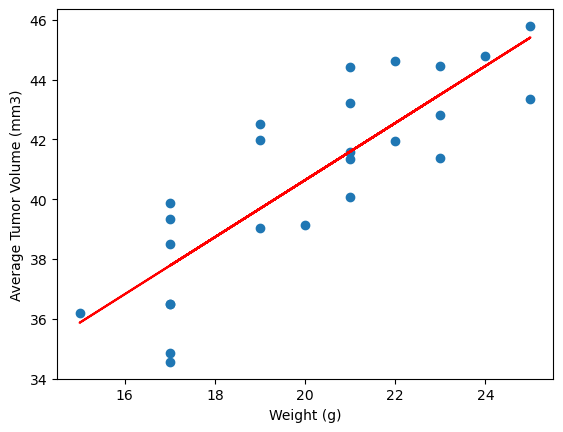

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(average_df['Weight (g)'], average_df['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(average_df["Weight (g)"],average_df["Tumor Volume (mm3)"])
regress_values=average_df["Weight (g)"]* slope + intercept

x_axis = average_df["Weight (g)"]
y_axis = average_df["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)

plt.plot(x_axis, regress_values, color='red')

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()